# Reviewing some basic statistics concepts

Ref: DataCamp

In [17]:
import seaborn as sns
sns.set() #to use seaborn's default style
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
df_swing = pd.read_csv('2008_swing_states.csv')

In [9]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


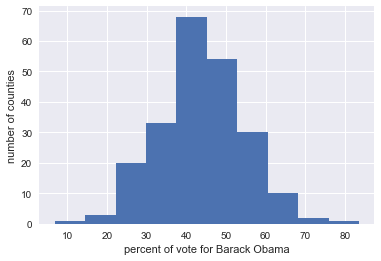

In [18]:
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Barack Obama')
_ = plt.ylabel('number of counties')

plt.hist returns three arrays which we are not interested in. Assign them to a dummy variable _ as is a common practice in Python.

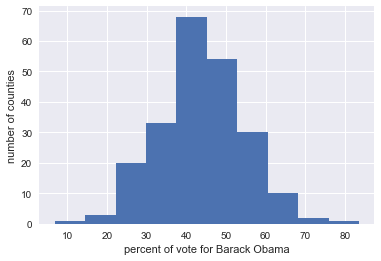

In [19]:
plt.hist(df_swing['dem_share']);
plt.xlabel('percent of vote for Barack Obama');
plt.ylabel('number of counties');

; does the same trick as _ -- suppresses the unwanted output

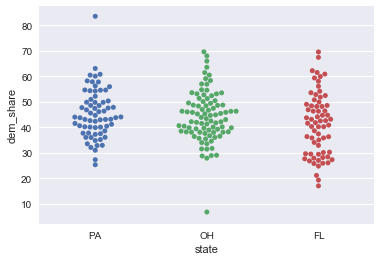

In [21]:
sns.swarmplot(x = 'state', y = 'dem_share', data = df_swing);

In [22]:
import numpy as np

In [24]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

** Empirical cumulative distribution function **

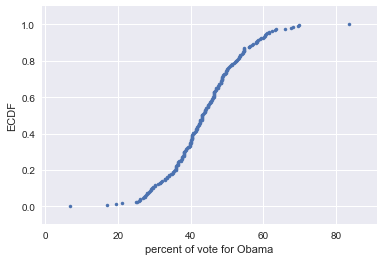

In [40]:
x = np.sort(df_swing['dem_share'])
y = np.arange(1., len(x) + 1) / len(x) 
plt.plot(x, y, marker = '.', linestyle = 'none');
plt.margins(0.1) # to make sure no data is cutoff
plt.xlabel('percent of vote for Obama');
plt.ylabel('ECDF');

In [41]:
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([ 37.3025,  43.185 ,  49.925 ])

### Hacker statistics

In [42]:
np.random.random(size = 5)

array([ 0.19066336,  0.08571126,  0.19614632,  0.29332768,  0.66529545])

In [43]:
np.random.random(size = 5)

array([ 0.03118521,  0.61640415,  0.01553315,  0.30709942,  0.09262133])

In [44]:
a = np.empty(10)

In [45]:
a

array([ 0.01 ,  0.02 ,  0.025,  0.05 ,  0.1  ,  0.2  ,  0.25 ,  0.5  ,
        1.   ,  2.   ])

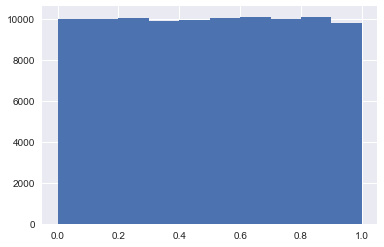

In [46]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


flat histogram as expected

In [47]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function

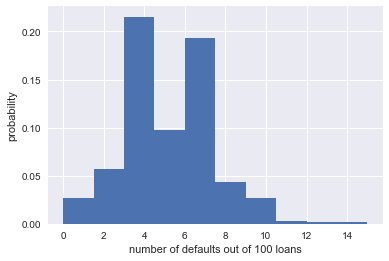

In [48]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed = True) #normed = True gives probability on Y axis
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


In [49]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1.0, n + 1) / n

    return x, y

Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

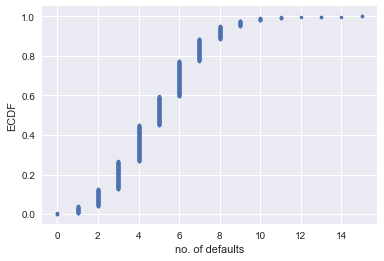

Probability of losing money = 0.022


In [53]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('no. of defaults')
plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print 'Probability of losing money =', float(n_lose_money) / len(n_defaults)

As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial()

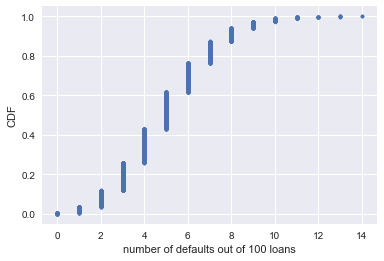

In [54]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)


# Plot the CDF with axis labels
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()


In [57]:
np.arange(0.5,3)

array([ 0.5,  1.5,  2.5])

In [58]:
 np.arange(0, max(n_defaults) + 1.5) - 0.5

array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5])

In [59]:
np.arange(-0.5, max(n_defaults) + 1)

array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5])

In [60]:
n_defaults

array([5, 5, 4, ..., 6, 1, 2])

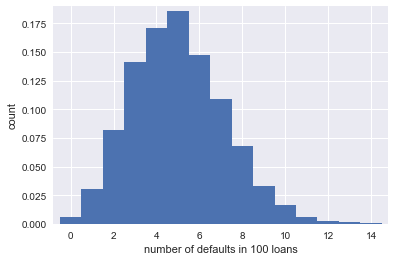

In [63]:
# Compute bin edges: bins
bins = np.arange(-0.5, max(n_defaults) + 1) 

# Generate histogram
plt.hist(n_defaults, bins=bins, normed = True)

# Set margins
plt.margins(0.02)

# Label axes
plt.xlabel('number of defaults in 100 loans')
plt.ylabel('count')

# Show the plot
plt.show()